# jobflow

## Define workflow with jobflow

In [1]:
from jobflow import job, Flow

/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "cipher": algorithms.TripleDES,
/srv/conda/envs/notebook/lib/python3.12/site-packages/paramiko/transport.py:253: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  "class": algorithms.TripleDES,


In [2]:
from python_workflow_definition.jobflow import write_workflow_json

In [3]:
from simple_workflow import (
    add_x_and_y as _add_x_and_y, 
    get_prod_and_div as _get_prod_and_div,
)

In [4]:
workflow_json_filename = "jobflow_simple.json"

In [5]:
add_x_and_y = job(_add_x_and_y)
get_prod_and_div = job(_get_prod_and_div, data=["prod", "div"])

In [6]:
obj = get_prod_and_div(x=1, y=2)

In [7]:
w = add_x_and_y(x=obj.output.prod, y=obj.output.div)

In [8]:
flow = Flow([obj, w])

In [9]:
write_workflow_json(flow=flow, file_name=workflow_json_filename)

In [10]:
!cat {workflow_json_filename}

{"nodes": {"0": "simple_workflow.add_x_and_y", "1": "simple_workflow.add_x_and_y_and_z", "2": 1, "3": 2}, "edges": [{"tn": 0, "th": "x", "sn": 2, "sh": null}, {"tn": 0, "th": "y", "sn": 3, "sh": null}, {"tn": 1, "th": "x", "sn": 0, "sh": "x"}, {"tn": 1, "th": "y", "sn": 0, "sh": "y"}, {"tn": 1, "th": "z", "sn": 0, "sh": "z"}]}

## Load Workflow with aiida

In [11]:
from aiida import load_profile

load_profile()

Profile<uuid='8bb81b57acda4bf6bbc69d5eb5ae123e' name='pwd'>

In [12]:
from python_workflow_definition.aiida import load_workflow_json

In [13]:
wg = load_workflow_json(file_name=workflow_json_filename)
wg

NodeGraphWidget(settings={'minimap': True}, style={'width': '90%', 'height': '600px'}, value={'name': 'WorkGra…

In [14]:
wg.run()

04/02/2025 02:37:38 PM <422> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [16|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y1
04/02/2025 02:37:38 PM <422> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [16|WorkGraphEngine|update_task_state]: Task: add_x_and_y1, type: PyFunction, finished.
04/02/2025 02:37:38 PM <422> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [16|WorkGraphEngine|continue_workgraph]: tasks ready to run: add_x_and_y_and_z2
04/02/2025 02:37:39 PM <422> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [16|WorkGraphEngine|update_task_state]: Task: add_x_and_y_and_z2, type: PyFunction, finished.
04/02/2025 02:37:39 PM <422> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [16|WorkGraphEngine|continue_workgraph]: tasks ready to run: 
04/02/2025 02:37:39 PM <422> aiida.orm.nodes.process.workflow.workchain.WorkChainNode: [REPORT] [16|WorkGraphEngine|finali

## Load Workflow with pyiron_base

In [15]:
from pyiron_base import Project

In [16]:
from python_workflow_definition.pyiron_base import load_workflow_json

In [17]:
pr = Project("test")
pr.remove_jobs(recursive=True, silently=True)

0it [00:00, ?it/s]

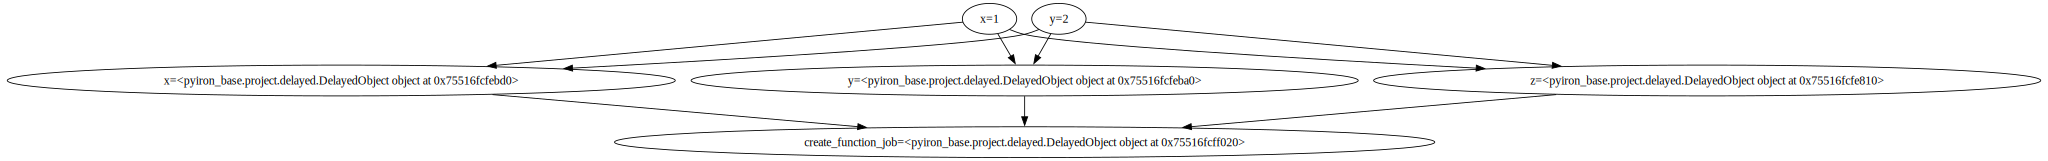

In [18]:
delayed_object = load_workflow_json(project=pr, file_name=workflow_json_filename)
delayed_object.draw()

In [19]:
delayed_object.pull()

The job add_x_and_y_68901482a2c5221cc845f828aabebd27 was saved and received the ID: 1
The job add_x_and_y_and_z_b671e81aaa4670d81d7eee509650af8d was saved and received the ID: 2


6